### 📚 Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 📖 Read Dataset

In [3]:
df=pd.read_csv("card_transdata.csv")
df


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


### Top 5 values

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Last 5 values 

In [5]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [8]:
df.shape

(1000000, 8)

In [9]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

###  Feature Explanation:
distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

## Finding the missing Values in the Dataset:

In [10]:
# checking null values 
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

There are no null values in this datset.

## Handling duplicated values:

In [15]:
df.duplicated().sum()

np.int64(0)

### Unique values of every columns:

In [25]:
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

### Exploratory Data Analysis (EDA):
    There are total of 8 columns: 3 continous, 4 categorical,and 1 target column
    There are 1000000 rows
    Fraud is the target variable
    No missing values
    No duplicate values 

### Basic statistics:

In [20]:
df["fraud"].describe()

count    1000000.000000
mean           0.087403
std            0.282425
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: fraud, dtype: float64

#### Target variable: fraud
    Mean = 0.0874 → only ~8.7% fraud cases
    This means dataset is highly imbalanced
    ~91.3% → Non-fraud
    ~8.7% → Fraud

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
df["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

### Data Insights:
In the given dataset, There are 87403 frauds which is 8.70% of given dataset.

In [6]:
cols=df.columns
cols

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

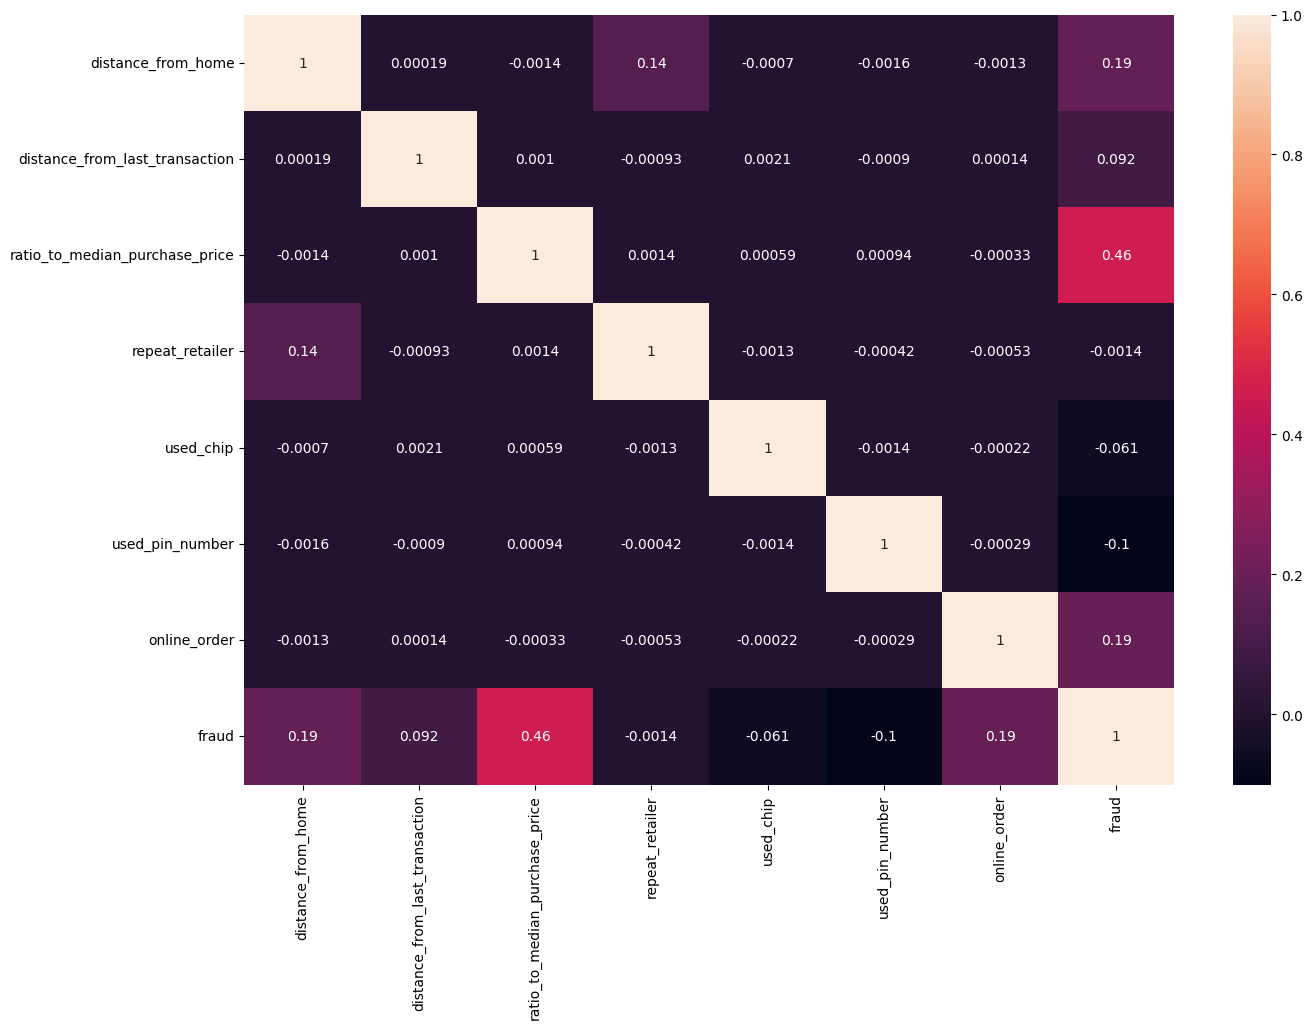

fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64

In [5]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, annot=True)

plt.show()
# Correlation of features with the target variable 'fraud'
correlation_with_target = correlation_matrix['fraud'].sort_values(ascending=False)
correlation_with_target

Most correlation values are very close to 0, which indicates that our features are weakly correlated

## Checking outliers 

In [7]:
skew=df[cols].skew()
skew

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

It shows distance_from_home, distance_from_last_transaction, and ratio_to_median_purchase_price are highly right-skewed.
This indicates the presence of extreme values and outliers, which are common in fraud-related transactions.

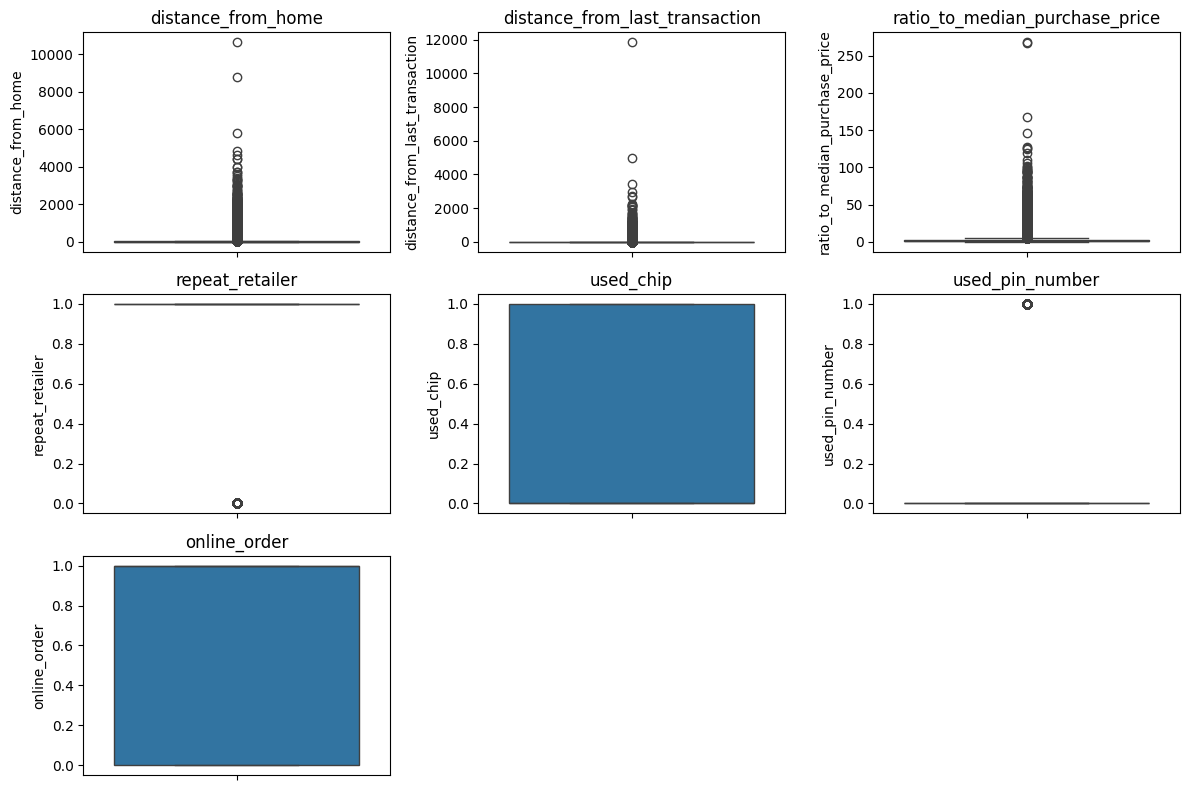

In [9]:
# Creating boxplots for all features
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Splitting the Dataset into Train & Test:

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='fraud')
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [7]:
print(f"shape of X_train - {X_train.shape}")
print(f"shape of X_test - {X_test.shape}")
print(f"shape of y_train - {y_train.shape}")
print(f"shape of y_test - {y_test.shape}")

shape of X_train - (800000, 7)
shape of X_test - (200000, 7)
shape of y_train - (800000,)
shape of y_test - (200000,)


## Handeling outliers 

In [8]:
def out_info(df, cols):
    out_df = pd.DataFrame(columns=[
        "col_name", "num_outliers", "%_outliers", "upper_whisker", "lower_whisker"
    ])

    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        uw = q3 + 1.5 * iqr
        lw = q1 - 1.5 * iqr
        mask = (df[col] > uw) | (df[col] < lw)
        num_out = mask.sum()
        perc_out = round(mask.mean() * 100, 2)

        out_df.loc[len(out_df)] = [
            col, num_out, perc_out, uw, lw]
        
    return out_df


In [9]:
out_cols = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price']

out_info(df, out_cols)

,col_name,num_outliers,%_outliers,upper_whisker,lower_whisker
0,distance_from_home,103631,10.36,58.542951,-28.920958
1,distance_from_last_transaction,124367,12.44,7.944363,-4.291945
2,ratio_to_median_purchase_price,84386,8.44,4.527416,-1.955372


In [10]:
log_cols    = [col + "_log" for col in out_cols]

# log transform (vectorized) (as ouliers are very extreme)
X_train[log_cols] = np.log1p(X_train[out_cols])
X_test[log_cols]  = np.log1p(X_test[out_cols])

# check outliers
out_info(X_train, log_cols)

,col_name,num_outliers,%_outliers,upper_whisker,lower_whisker
0,distance_from_home_log,4656,0.58,5.840592,-0.968757
1,distance_from_last_transaction_log,28127,3.52,3.286995,-1.556525
2,ratio_to_median_purchase_price_log,20859,2.61,2.242052,-0.722155


still there is some outliers to make it more cleaner iqr method is applied

In [11]:
#Apply IQR capping on log-transformed columns
def iqr_cap(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

In [12]:
capped_cols = [col + "_capped" for col in log_cols]

# IQR capping
for col in log_cols:
    lower, upper = iqr_cap(X_train[col])
    X_train[col + "_capped"] = X_train[col].clip(lower, upper)
    X_test[col + "_capped"]  = X_test[col].clip(lower, upper)
    
# check outliers
out_info(X_train, capped_cols)

,col_name,num_outliers,%_outliers,upper_whisker,lower_whisker
0,distance_from_home_log_capped,0,0.0,5.840592,-0.968757
1,distance_from_last_transaction_log_capped,0,0.0,3.286995,-1.556525
2,ratio_to_median_purchase_price_log_capped,0,0.0,2.242052,-0.722155


####  Exporting x_train, x_test, y_train, y_test in CSV files

In [13]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)